   # Mental Health Analysis in Technology-related Jobs

# Employee Survey Categorization and Visualization

The task involves supporting HR in a tech company to develop a mental health mitigation program through data analysis. Challenges include high data complexity and missing or non-standard inputs. The objective is to simplify and categorize survey data into clusters, create interpretable visualizations, and provide insights for targeted actions. The process will include data preprocessing, feature engineering, and iterative analysis, with a critical evaluation at each step. The results, along with the implementation code, will be documented and shared for evaluation.

## Exploratory Data Analysis

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import f_oneway
from math import pi
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load the Data into a DataFrame

In [2]:
data = pd.read_csv("data.csv")

### Initial Data Check

In [3]:
# Displaying the first few rows of the dataset to get an overview
data_overview = data.head()
data_overview

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
# Summary statistics for numerical columns
numerical_summary = data.describe()
numerical_summary

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


### Missing Value Check

In [5]:
# Set display options
pd.set_option('display.max_rows', None)
# Counting missing values in each column
missing_values_count = data.isnull().sum()
# Displaying the missing values count for each column
print(missing_values_count)

Are you self-employed?                                                                                                                                                                 0
How many employees does your company or organization have?                                                                                                                           287
Is your employer primarily a tech company/organization?                                                                                                                              287
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    287
Do you know the options for mental health care available under your employe

### Identifying Numerical & Categorical Variables

In [6]:
# Identifying numerical variables
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Variables:")
print(numerical_vars)

Numerical Variables:
Index(['Are you self-employed?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Do you have previous employers?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'What is your age?'],
      dtype='object')


In [7]:
# Identifying categorical variables
categorical_vars = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Variables:")
print(categorical_vars)


Categorical Variables:
Index(['How many employees does your company or organization have?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Do you think that discussing a physical health iss

### Renaming Columns & Checking Correctness

In [8]:
# renaming columns
rename_dict = {
    'Are you self-employed?': 'self_employed',
    'How many employees does your company or organization have?': 'company_size',
    'Is your employer primarily a tech company/organization?': 'employer_is_tech',
    'Is your primary role within your company related to tech/IT?': 'role_related_to_tech',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'employer_mental_health_coverage',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'knowledge_of_mental_health_coverage',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'employer_mental_health_discussion',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'employer_mental_health_resources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity_protection',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'ease_of_leave_request',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'mental_health_discussion_consequences',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'physical_health_discussion_consequences',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'comfort_discussing_mental_health_with_coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'comfort_discussing_mental_health_with_supervisor',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'employer_equal_view_on_mental_physical_health',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'observed_consequences_of_mental_health_disclosure',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?': 'medical_coverage_including_mental',
    'Do you know local or online resources to seek help for a mental health disorder?': 'awareness_of_mental_health_resources',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'disclosure_to_clients',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'impact_of_disclosure_to_clients',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'disclosure_to_coworkers',
    'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'impact_of_disclosure_to_coworkers',
    'Do you believe your productivity is ever affected by a mental health issue?': 'mental_health_impact_on_productivity',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'percentage_work_time_affected',
    'Do you have previous employers?': 'has_previous_employers',
    'Have your previous employers provided mental health benefits?': 'previous_employers_mental_health_benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'awareness_of_previous_employer_mental_health_benefits',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'previous_employer_mental_health_discussion',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'previous_employer_mental_health_resources',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'anonymity_protection_with_previous_employers',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'previous_employer_mental_health_discussion_consequences',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'previous_employer_physical_health_discussion_consequences',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'willingness_to_discuss_with_previous_coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'willingness_to_discuss_with_previous_supervisor',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'previous_employer_view_on_mental_vs_physical',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'observed_previous_workplace_consequences',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'willingness_to_discuss_physical_health_in_interview',
    'Why or why not?': 'reason_for_discussing_physical_health',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'willingness_to_discuss_mental_health_in_interview',
    'Why or why not?.1': 'reason_for_discussing_mental_health',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'impact_of_mental_health_identification_on_career',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'perceived_coworker_view_on_mental_health',
    'How willing would you be to share with friends and family that you have a mental illness?': 'willingness_to_share_with_friends_family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'observed_unsupportive_response',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'impact_of_others_experiences_on_disclosure',
    'Do you have a family history of mental illness?': 'family_history_of_mental_illness',
    'Have you had a mental health disorder in the past?': 'past_mental_health_disorder',
    'Do you currently have a mental health disorder?': 'current_mental_health_disorder',
    'If yes, what condition(s) have you been diagnosed with?': 'diagnosed_conditions',
    'If maybe, what condition(s) do you believe you have?': 'possible_undiagnosed_conditions',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'diagnosed_by_professional',
    'If so, what condition(s) were you diagnosed with?': 'professional_diagnosed_conditions',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'sought_mental_health_treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'work_interference_when_treated',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'work_interference_when_not_treated',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you live in?': 'country_of_residence',
    'What US state or territory do you live in?': 'us_state_of_residence',
    'What country do you work in?': 'country_of_work',
    'What US state or territory do you work in?': 'us_state_of_work',
    'Which of the following best describes your work position?': 'work_position',
    'Do you work remotely?': 'remote_work_status'
}
# Rename the columns
data.rename(columns=rename_dict, inplace=True)

In [9]:
# Checking the column names
print(data.columns)

Index(['self_employed', 'company_size', 'employer_is_tech',
       'role_related_to_tech', 'employer_mental_health_coverage',
       'knowledge_of_mental_health_coverage',
       'employer_mental_health_discussion', 'employer_mental_health_resources',
       'anonymity_protection', 'ease_of_leave_request',
       'mental_health_discussion_consequences',
       'physical_health_discussion_consequences',
       'comfort_discussing_mental_health_with_coworkers',
       'comfort_discussing_mental_health_with_supervisor',
       'employer_equal_view_on_mental_physical_health',
       'observed_consequences_of_mental_health_disclosure',
       'medical_coverage_including_mental',
       'awareness_of_mental_health_resources', 'disclosure_to_clients',
       'impact_of_disclosure_to_clients', 'disclosure_to_coworkers',
       'impact_of_disclosure_to_coworkers',
       'mental_health_impact_on_productivity', 'percentage_work_time_affected',
       'has_previous_employers', 'previous_employers

### Display Dataframe Summary

In [10]:
# To get a concise summary of the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   self_employed                                              1433 non-null   int64  
 1   company_size                                               1146 non-null   object 
 2   employer_is_tech                                           1146 non-null   float64
 3   role_related_to_tech                                       263 non-null    float64
 4   employer_mental_health_coverage                            1146 non-null   object 
 5   knowledge_of_mental_health_coverage                        1013 non-null   object 
 6   employer_mental_health_discussion                          1146 non-null   object 
 7   employer_mental_health_resources                           1146 non-null   object 
 8   anonymit

## Data Pre-processing

### Replace misinterpreted entry 01-May as 1-5 and Jun-25 as 6-25 in column ('company_size')

In [11]:
# Correcting the misinterpreted date entries with .loc[] in column 2
data.loc[:, 'company_size'] = data['company_size'].replace({'01-05': '1-5', '01-06': '6-25'})
# Define a mapping for ranges to categories, including the corrected ones
employee_count_map = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26 - 100': '26-100',
    '100-500': '101-500',
    '500-1000': '501-1000',
    'More than 1000': '1000+'
}

# Applying the mapping to the 'company_size' column with .loc[]
data.loc[:, 'company_size'] = data['company_size'].replace(employee_count_map)
# Check the transformation
print(data['company_size'].value_counts())

26-100      292
1000+       256
101-500     248
6-25        210
501-1000     80
1-5          60
Name: company_size, dtype: int64


In [12]:
# Display all unique values in the 'how_many_employees_does' column
unique_employee_counts = data['company_size'].unique()
print(unique_employee_counts)

['26-100' '6-25' nan '1000+' '101-500' '501-1000' '1-5']


### Standardizing the 'gender' column by consolidating various text inputs into three categories: 'Male', 'Female', and 'Neutral'

It's aimed at normalizing the data to reduce the variability caused by different textual representations of gender identities, such as various spellings and terms that essentially refer to the same gender. After replacement, the 'gender' column will have consistent labels, facilitating accurate analysis and interpretation.

In [13]:
# Displaying unique values in the 'gender' column
unique_genders = data['gender'].unique()
print(unique_genders)

['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan
 'Male (cis)' 'Other' 'nb masculine' 'Cisgender Female' 'Man'
 'Sex is male' 'none of your business' 'genderqueer' 'cis male' 'Human'
 'Genderfluid' 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender'
 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'mail' 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'male ' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Cis Male' 'Male (trans, FtM)' 'Cis-woman' 'Genderqueer'
 'cisdude' 'Genderflux demi-girl'


In [14]:
# Code to standardize 'gender' values
gender_replacements = {
    'male': 'Male', 'Male': 'Male', 'mail': 'Male', 'MALE': 'Male', 'nb masculine': 'Male', 
    'M': 'Male', 'm': 'Male', 'Man': 'Male', 'M|': 'Male', 'Male ': 'Male', 'Male.': 'Male', 'Cis male': 'Male', 
    'cis male': 'Male', 'cisdude': 'Male', 'Cis Male': 'Male', 'cis man': 'Male', 'Malr': 'Male', 
    'Dude': 'Male', 'male ': 'Male', 'Man': 'Male', 'Male (cis)': 'Male', 'Sex is male': 'Male', 'man': 'Male',
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ": 'Male',
    'Female': 'Female', 'Cis-woman': 'Female', 'fem': 'Female', 'Woman': 'Female', 'F': 'Female', 'female/woman': 'Female',
    'f': 'Female', 'I identify as female.': 'Female', 'female-bodied': 'Female', 'woman': 'Female', 'female': 'Female',
    'female ': 'Female', 'Female ': 'Female', 'Cis female ': 'Female', 'Cisgender Female': 'Female', 
    'Female (props for making this a freeform field, though)': 'Female', ' Female': 'Female', 'Female assigned at birth ': 'Female','non-binary': 'Neutral', 'Nonbinary': 'Neutral', 'Agender': 'Neutral', 'AFAB': 'Neutral',
    'female-bodied; no feelings about gender': 'Neutral', 'Genderflux demi-girl': 'Neutral',
    'Genderqueer': 'Neutral', 'Male (trans, FtM)': 'Neutral', 'genderqueer woman': 'Neutral',
    'human': 'Neutral', 'Male/genderqueer': 'Neutral', 'Fluid': 'Neutral',
    'Queer': 'Neutral', 'mtf': 'Neutral', 'Unicorn': 'Neutral', 'Enby': 'Neutral',
    'Genderfluid': 'Neutral', 'Human': 'Neutral', 'genderqueer': 'Neutral',
    'none of your business': 'Neutral', 'Other': 'Neutral', 'male 9:1 female, roughly': 'Neutral',
    'Androgynous': 'Neutral', 'Female or Multi-Gender Femme': 'Neutral',
    'Other/Transfeminine': 'Neutral', 'Genderfluid (born female)': 'Neutral',
    'Transitioned, M2F': 'Neutral', 'fm': 'Neutral', 'Bigender': 'Neutral',
    'Transgender woman': 'Neutral' 
    
}

data['gender'] = data['gender'].replace(gender_replacements)

# Verifying the changes
print(data['gender'].value_counts())

Male       1058
Female      337
Neutral      35
Name: gender, dtype: int64


### Categorizing age into four categories (less than 30, 31 to 40, 41 to 50, greater than 50)

The code defines a function to categorize ages into four groups: under 30, between 31 and 40, between 41 and 50, and over 50. It then applies this function to the 'age' column of the dataset to create a new 'age_category' column. This categorization simplifies the age data, allowing for easier analysis and visualization by age group. After categorizing, it prints the distribution of the data across these new age categories.

In [15]:
# Function to categorize age
def categorize_age(age):
    if age < 30:
        return '<30'
    elif 30 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    else:
        return '>50'

# Applying the function to the 'age' column
data['age_category'] = data['age'].apply(categorize_age)

# Verifying the changes
print(data['age_category'].value_counts())


31-40    714
<30      450
41-50    208
>50       61
Name: age_category, dtype: int64


### Categorizing country of residance and work into three categories (US, UK, Others)

This step involves visualizing the distribution of respondents' countries of residence and then categorizing these countries into three groups: 'United States of America', 'United Kingdom', and 'Others'. This categorization simplifies the dataset for analysis by reducing the number of unique country categories, focusing on the two most represented countries and grouping the rest into 'Others'. The process is repeated similarly for the 'country_of_work' column. The categorization facilitates comparisons and insights based on the geographical location of the respondents' residence and workplace.

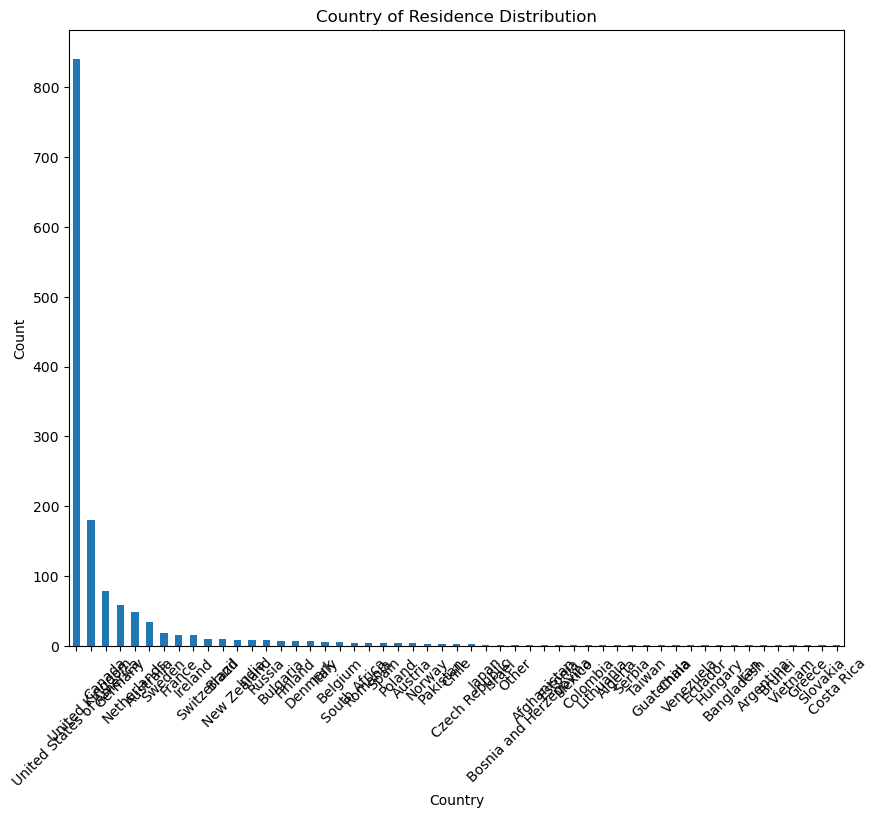

In [16]:
# Counting the occurrences of each country in the 'country_of_residence' column
country_counts = data['country_of_residence'].value_counts()

# Creating a bar plot
plt.figure(figsize=(10, 8))
country_counts.plot(kind='bar')
plt.title('Country of Residence Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [17]:
# Function to categorize country of residence
def categorize_country(country):
    if country == 'United States of America':
        return 'United States of America'
    elif country == 'United Kingdom':
        return 'United Kingdom'
    else:
        return 'Others'

# Applying the function to the 'country_of_residence' column
data['country_category'] = data['country_of_residence'].apply(categorize_country)

# Verifying the changes
print(data['country_category'].value_counts())

United States of America    840
Others                      413
United Kingdom              180
Name: country_category, dtype: int64


In [18]:
# Function to categorize country of work
def categorize_country_work(country):
    if country == 'United States of America':
        return 'United States of America'
    elif country == 'United Kingdom':
        return 'United Kingdom'
    else:
        return 'Others'

# Applying the function to the 'country_of_work' column
data['country_of_work_category'] = data['country_of_work'].apply(categorize_country_work)

# Verifying the changes
print(data['country_of_work_category'].value_counts())

United States of America    851
Others                      399
United Kingdom              183
Name: country_of_work_category, dtype: int64


### Checking size of dataframe

In [19]:
# Display the shape of the DataFrame
print(data.shape)

(1433, 66)


### Feature Selection & Extraction

Removing columns related to the reasons for discussing physical and mental health from the dataset. These columns likely contain freeform textual responses, which are complex to analyze quantitatively and could be highly individualized. By removing them, the dataset is simplified, focusing on more structured and easily analyzable data, which is more suitable for clustering and other statistical analyses.

In [20]:
# Removing the specified columns
data.drop(columns=['reason_for_discussing_physical_health', 'reason_for_discussing_mental_health'], inplace=True)

Removing the original 'country_of_work', 'country_of_residence' and 'aage' columns from the dataset, following their categorization into simplified groups ('United States of America', 'United Kingdom', and 'Others') stored in 'country_category' and 'country_of_work_category'and age as age_category. This step avoids redundancy in the data and focuses on the simplified, categorized data for more efficient analysis. 

In [21]:
# Removing the specified columns from the DataFrame 'data'
data.drop(columns=['country_of_work','age', 'country_of_residence'], inplace=True)

# Verifying that the columns have been removed
print(data.shape)

(1433, 61)


Filtering out responses from self-employed individuals in the dataset. Since the focus of the analysis is on tech employees within a company, and many survey questions are not applicable or relevant to self-employed individuals, their data is excluded. This ensures that the analysis and subsequent insights are specific to the target group, thereby enhancing the relevance and accuracy of the study.

In [22]:
# Removing rows where 'self_employed' is '1'
data = data[data['self_employed'] != 1]

In [23]:
# Verifying that the columns have been removed
print(data.shape)

(1146, 61)


Filtering the dataset to include only those respondents who work in tech companies (where 'employer_is_tech' equals 1). Responses from employees in non-tech companies are removed. This ensures the focus remains on mental health issues specifically within the technology sector, aligning with the task's scope to analyze mental health among tech employees. This filtering step helps maintain the relevance and specificity of the analysis to the target group.

In [24]:
# Removing rows where 'employer_is_tech' is 0
data = data[data['employer_is_tech'] == 1]

In [25]:
# Verifying that the columns have been removed
print(data.shape)

(883, 61)


Removing the columns 'self_employed', 'employer_is_tech', and 'role_related_to_tech' from the dataset. These columns are excluded because the analysis focuses specifically on employees in tech roles within organizations, not on self-employed individuals or those in non-tech roles.

In [26]:
# Removing the specified columns from the DataFrame 'data'
data.drop(columns=['self_employed', 'employer_is_tech', 'role_related_to_tech' ], inplace=True)

# Verifying that the columns have been removed
print(data.shape)

(883, 58)


### Check Dataframe

In [27]:
# To get a concise summary of the tech based DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 1432
Data columns (total 58 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   company_size                                               883 non-null    object 
 1   employer_mental_health_coverage                            883 non-null    object 
 2   knowledge_of_mental_health_coverage                        776 non-null    object 
 3   employer_mental_health_discussion                          883 non-null    object 
 4   employer_mental_health_resources                           883 non-null    object 
 5   anonymity_protection                                       883 non-null    object 
 6   ease_of_leave_request                                      883 non-null    object 
 7   mental_health_discussion_consequences                      883 non-null    object 
 8   physical_

Removing columns from the dataset that have zero non-null values. These columns are likely irrelevant or not applicable to the current analysis focus, due to the filtering of self-employed and non-tech employees. Removing these columns, which lack data for the remaining subset of respondents, streamlines the dataset, reducing complexity and focusing on meaningful and analyzable data.

In [28]:
# Removing the specified columns with zero nonnull values from the DataFrame 'data'
data.drop(columns=['medical_coverage_including_mental', 'awareness_of_mental_health_resources', 'disclosure_to_clients', 'impact_of_disclosure_to_clients', 'disclosure_to_coworkers', 'mental_health_impact_on_productivity', 'impact_of_disclosure_to_coworkers', 'percentage_work_time_affected'], inplace=True)

# Verifying that the columns have been removed
print(data.shape)

(883, 50)


Updating the 'us_state_of_residence' column and 'us_state_of_work' column in the dataset to 'Non-US' for respondents whose 'country_category' and 'country_of_work_category'  is not 'United States of America'. This action is taken because non-U.S. residents typically have not provided a U.S. state name, leaving this information blank. By labeling these entries as 'Non-US', the dataset becomes more consistent and interpretable, as it clearly differentiates between U.S. residents and those from other countries.

In [29]:
# Filling 'us_state_of_residence' as 'Non-US' for rows where 'country_category' is not 'United States of America'
data.loc[data['country_category'] != 'United States of America', 'us_state_of_residence'] = 'Non-US'

# Verifying the changes
print(data[['country_category', 'us_state_of_residence']].head())


           country_category us_state_of_residence
0            United Kingdom                Non-US
1  United States of America              Illinois
2            United Kingdom                Non-US
5            United Kingdom                Non-US
6  United States of America             Tennessee


In [30]:
# Filling 'us_state_of_work' as 'Non-US' for rows where 'country_of_work_category' is not 'United States of America'
data.loc[data['country_of_work_category'] != 'United States of America', 'us_state_of_work'] = 'Non-US'

# Verifying the changes
print(data[['country_of_work_category', 'us_state_of_work']].head())


   country_of_work_category us_state_of_work
0            United Kingdom           Non-US
1  United States of America         Illinois
2            United Kingdom           Non-US
5            United Kingdom           Non-US
6  United States of America        Tennessee


## Handling Missing Values

In [31]:
data.isnull().sum()

company_size                                                   0
employer_mental_health_coverage                                0
knowledge_of_mental_health_coverage                          107
employer_mental_health_discussion                              0
employer_mental_health_resources                               0
anonymity_protection                                           0
ease_of_leave_request                                          0
mental_health_discussion_consequences                          0
physical_health_discussion_consequences                        0
comfort_discussing_mental_health_with_coworkers                0
comfort_discussing_mental_health_with_supervisor               0
employer_equal_view_on_mental_physical_health                  0
observed_consequences_of_mental_health_disclosure              0
has_previous_employers                                         0
previous_employers_mental_health_benefits                     95
awareness_of_previous_emp

Handling missing values in the 'knowledge_of_mental_health_coverage' column using mode imputation. The mode (the most frequently occurring value) of this column is identified and used to fill in any missing or null values.

In [32]:
mode_value = data['knowledge_of_mental_health_coverage'].mode()[0]
data['knowledge_of_mental_health_coverage'].fillna(mode_value, inplace=True)

In [33]:
null_count = data['knowledge_of_mental_health_coverage'].isnull().sum()
print("Number of null values after imputation:", null_count)

Number of null values after imputation: 0


### Handling Missing Data for Respondents with No Previous Employers in Survey Columns by filing with 'NPE'

In [34]:
# Counting the number of 1s and 0s in the 'has_previous_employers' column
employer_count = data['has_previous_employers'].value_counts()

# Displaying the count
print(employer_count)


1    788
0     95
Name: has_previous_employers, dtype: int64


In [35]:
# List of columns where missing values need to be filled with 'NPE'
columns_to_fill = [
    'previous_employers_mental_health_benefits',
    'awareness_of_previous_employer_mental_health_benefits',
    'previous_employer_mental_health_discussion',
    'previous_employer_mental_health_resources',
    'anonymity_protection_with_previous_employers',
    'previous_employer_mental_health_discussion_consequences',
    'previous_employer_physical_health_discussion_consequences',
    'willingness_to_discuss_with_previous_coworkers',
    'willingness_to_discuss_with_previous_supervisor',
    'previous_employer_view_on_mental_vs_physical',
    'observed_previous_workplace_consequences'
]

# Filling missing values with 'NPE'
for column in columns_to_fill:
    data[column].fillna('NPE', inplace=True)

# Verifying the changes
print(data[columns_to_fill].isnull().sum())


previous_employers_mental_health_benefits                    0
awareness_of_previous_employer_mental_health_benefits        0
previous_employer_mental_health_discussion                   0
previous_employer_mental_health_resources                    0
anonymity_protection_with_previous_employers                 0
previous_employer_mental_health_discussion_consequences      0
previous_employer_physical_health_discussion_consequences    0
willingness_to_discuss_with_previous_coworkers               0
willingness_to_discuss_with_previous_supervisor              0
previous_employer_view_on_mental_vs_physical                 0
observed_previous_workplace_consequences                     0
dtype: int64


Imputing missing values in the 'observed_unsupportive_response' column using mode imputation. First, the most common value (mode) in this column is determined. Then, this mode value is used to fill in all missing or null entries in the column.

In [36]:
# Finding the most common value (mode) in the 'observed_unsupportive_response' column
mode_value_unsupportive_response = data['observed_unsupportive_response'].mode()[0]

# Filling missing values in the column with the mode
data['observed_unsupportive_response'].fillna(mode_value_unsupportive_response, inplace=True)

# Verifying that there are no more missing values in the column
null_count = data['observed_unsupportive_response'].isnull().sum()
print("Number of null values after imputation:", null_count)


Number of null values after imputation: 0


Categorizing missing values in the 'impact_of_others_experiences_on_disclosure' column as 'Unknown'. This approach addresses missing data by assigning a default value that indicates the absence of specific information. It helps in maintaining the completeness of the dataset while acknowledging that certain responses were not provided.

In [37]:
# Categorizing missing values as 'Unknown'
data['impact_of_others_experiences_on_disclosure'].fillna('Unknown', inplace=True)

In [38]:
# Verifying that there are no more missing values in the column
null_count1 = data['impact_of_others_experiences_on_disclosure'].isnull().sum()
print("Number of impact_of_others_experiences_on_disclosure:", null_count1)

Number of impact_of_others_experiences_on_disclosure: 0


Addressing missing values in the 'diagnosed_conditions' column by filling them with 'Not diagnosed'. This approach assumes that if a respondent did not provide information about diagnosed conditions, they likely do not have a diagnosed condition. 

In [39]:
# Filling missing values in the 'diagnosed_conditions' column with 'Not diagnosed'
data['diagnosed_conditions'].fillna('Not diagnosed', inplace=True)

# Verifying that there are no more missing values in the column
null_count = data['diagnosed_conditions'].isnull().sum()
print("Number of null values after imputation:", null_count)


Number of null values after imputation: 0


Filling missing values in the 'possible_undiagnosed_conditions' column with 'No guess/No issue'. This action assumes that if a respondent left this field blank, they either have no undiagnosed conditions or are not speculating about any potential undiagnosed conditions.

In [40]:
# Filling missing values in the 'possible_undiagnosed_conditions' column with 'No guess/No issue'
data['possible_undiagnosed_conditions'].fillna('No guess/No issue', inplace=True)

# Verifying that there are no more missing values in the column
null_count = data['possible_undiagnosed_conditions'].isnull().sum()
print("Number of null values after imputation:", null_count)


Number of null values after imputation: 0


Addressing missing values in the 'professional_diagnosed_conditions' column by filling them with 'Not diagnosed/No issue'. This imputation assumes that if respondents did not specify any conditions diagnosed by a professional, they either do not have such diagnoses or there are no relevant issues to report.

In [41]:
# Filling missing values in the 'professional_diagnosed_conditions' column
data['professional_diagnosed_conditions'].fillna('Not diagnosed/No issue', inplace=True)

# Verifying that there are no more missing values in the column
null_count = data['professional_diagnosed_conditions'].isnull().sum()
print("Number of null values after imputation:", null_count)


Number of null values after imputation: 0


Filling the sole missing value in the 'gender' column with 'Neutral'. This imputation strategy provides a neutral, non-specific gender category for the missing entry, ensuring that the dataset is complete without making assumptions about the individual's gender.

In [42]:
# Filling missing values in the 'gender' column with 'Neutral'
data['gender'].fillna('Neutral', inplace=True)

# Verifying that there are no more missing values in the column
null_count = data['gender'].isnull().sum()
print("Number of null values after imputation in 'gender':", null_count)


Number of null values after imputation in 'gender': 0


### Final Check of Missing Values

In [43]:
data.isnull().sum()

company_size                                                 0
employer_mental_health_coverage                              0
knowledge_of_mental_health_coverage                          0
employer_mental_health_discussion                            0
employer_mental_health_resources                             0
anonymity_protection                                         0
ease_of_leave_request                                        0
mental_health_discussion_consequences                        0
physical_health_discussion_consequences                      0
comfort_discussing_mental_health_with_coworkers              0
comfort_discussing_mental_health_with_supervisor             0
employer_equal_view_on_mental_physical_health                0
observed_consequences_of_mental_health_disclosure            0
has_previous_employers                                       0
previous_employers_mental_health_benefits                    0
awareness_of_previous_employer_mental_health_benefits  

In [44]:
data.shape

(883, 50)

### Descriptive Statistics

In [45]:
# Descriptive statistics for numerical variables
print(data.describe())

# Descriptive statistics for categorical variables
print(data.describe(include=['object']))


       has_previous_employers  sought_mental_health_treatment
count              883.000000                      883.000000
mean                 0.892412                        0.573046
std                  0.310035                        0.494916
min                  0.000000                        0.000000
25%                  1.000000                        0.000000
50%                  1.000000                        1.000000
75%                  1.000000                        1.000000
max                  1.000000                        1.000000
       company_size employer_mental_health_coverage  \
count           883                             883   
unique            6                               4   
top          26-100                             Yes   
freq            246                             408   

       knowledge_of_mental_health_coverage employer_mental_health_discussion  \
count                                  883                               883   
unique

## Encoding

In [46]:
# Creating an instance of LabelEncoder
labelencoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = data.select_dtypes(include=['object']).columns

# Applying Label Encoding to each categorical column
for column in categorical_columns:
    # Only apply label encoding if the column has more than one unique value
    if len(data[column].unique()) > 1:
        data[column] = labelencoder.fit_transform(data[column])

# Verifying some of the changes
data.head()


,company_size,employer_mental_health_coverage,knowledge_of_mental_health_coverage,employer_mental_health_discussion,employer_mental_health_resources,anonymity_protection,ease_of_leave_request,mental_health_discussion_consequences,physical_health_discussion_consequences,comfort_discussing_mental_health_with_coworkers,...,work_interference_when_treated,work_interference_when_not_treated,gender,us_state_of_residence,us_state_of_work,work_position,remote_work_status,age_category,country_category,country_of_work_category
0,3,2,1,1,1,0,5,1,1,0,...,1,1,1,30,31,0,2,0,1,1
1,5,1,2,2,2,2,3,1,1,0,...,3,4,1,11,12,6,1,2,2,2
2,5,1,1,1,1,0,1,0,1,0,...,1,1,1,30,31,0,0,0,1,1
5,1,3,0,1,2,2,3,2,2,0,...,1,2,1,30,31,42,2,1,1,1
6,3,0,1,1,1,0,3,1,1,0,...,1,1,1,39,40,0,2,0,2,2


## Dimentionality Reduction Using PCA

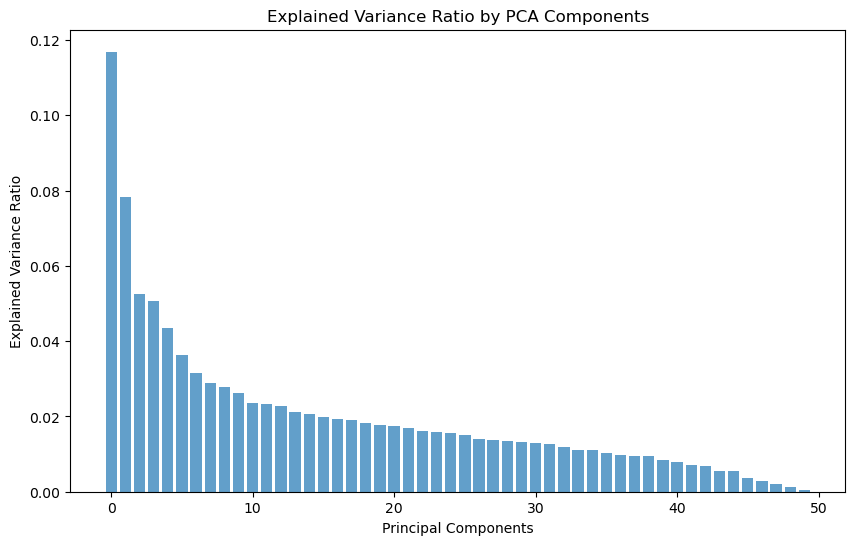

In [47]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Applying PCA
pca = PCA()
pca.fit(scaled_data)

# Getting the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by PCA Components')
plt.show()


The bar plot visualizes the explained variance ratio of each principal component obtained from PCA applied to the scaled dataset. It helps determine how many components to retain to capture significant variance. Based on the plot, the variance decreases significantly after the first few components and flattens out around the 40th component. Therefore, choosing n_components=40 for PCA balances dimensionality reduction with information retention, capturing most variability in the data with fewer components. This selection facilitates more efficient computation and potentially better model performance with a reduced feature set.

In [48]:
# Applying PCA with 40 components
pca = PCA(n_components=40)
reduced_data = pca.fit_transform(scaled_data)

# Verifying the shape of the reduced data
print(reduced_data.shape)

(883, 40)


In [49]:
reduced_data

array([[ 9.21530307e-01,  7.19639612e-01, -7.92296129e-01, ...,
         1.30335903e+00, -3.33430114e-01, -3.72102124e-01],
       [-3.83184844e+00,  1.77701990e+00,  7.86103883e-01, ...,
         7.33964891e-01,  2.93212011e-01,  6.67981838e-01],
       [ 2.20700068e+00, -1.25487262e+00,  3.36201470e-01, ...,
         8.53714535e-02, -1.00429030e+00, -4.02645687e-01],
       ...,
       [-3.81862780e+00,  7.72752523e-01,  8.43103866e-01, ...,
         1.63422494e-03, -1.09111051e+00,  6.75183637e-01],
       [-3.69725081e+00, -1.68927255e-01,  7.92105993e-01, ...,
         1.23511311e+00,  1.06276219e+00, -5.72062034e-02],
       [ 4.60924117e+00,  3.40151165e+00, -1.15622323e+00, ...,
         6.99778191e-01,  9.83741314e-01,  2.38500743e-01]])

## Clustering

### Finding the optimum number of clusters using Elbow method and Silhouette score

C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

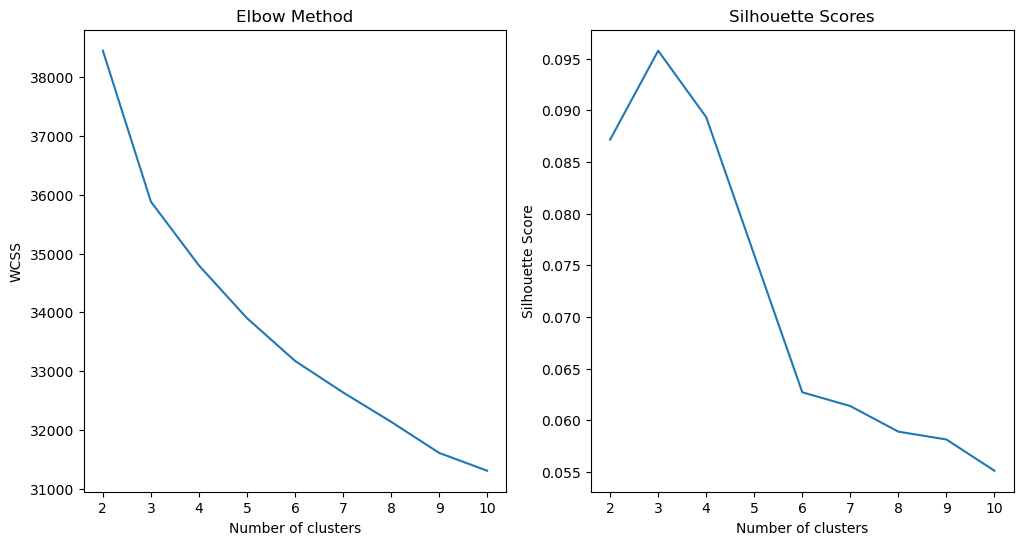

In [50]:

# Function to calculate the within-cluster sum of squares (inertia)
def calculate_wcss(data):
    wcss = []
    for n in range(2, 11):  # Checking for 2 to 10 clusters
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to calculate the average silhouette score
def calculate_silhouette(data):
    silhouette = []
    for n in range(2, 11):  # Checking for 2 to 10 clusters
        kmeans = KMeans(n_clusters=n, random_state=0)
        cluster_labels = kmeans.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette.append(score)
    return silhouette

# Calculating WCSS and Silhouette scores
wcss = calculate_wcss(reduced_data)
silhouette = calculate_silhouette(reduced_data)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting WCSS (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()


The Elbow Method graph shows a consistent decrease in WCSS (Within-Cluster Sum of Squares) without a clear 'elbow' point, which usually indicates a clear drop in WCSS and suggests the optimal number of clusters. However, there is a slight inflection point at 3 clusters, after which the rate of decrease in WCSS slows down somewhat.

The Silhouette Score graph has a peak at 3 clusters, indicating that the average silhouette score is highest at this point. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better-defined clusters. Hence K=3

In [51]:
# Applying KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0)
clusters_3 = kmeans_3.fit_predict(reduced_data)

# Adding the cluster labels to the original dataframe for further analysis
data['cluster_label_k3'] = clusters_3

# Verifying the cluster labels
print(data['cluster_label_k3'].value_counts())

C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RUBAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


1    394
2    393
0     96
Name: cluster_label_k3, dtype: int64


## Cluster Profile using Mean

In [52]:
# Create a new DataFrame for cluster analysis
cluster_analysis_df = data.copy()

# Adding the cluster labels to this DataFrame
cluster_analysis_df['cluster'] = clusters_3

# Calculate the mean or median for all variables by cluster
cluster_profiles = cluster_analysis_df.groupby('cluster').mean()  # Use .median() if more appropriate

# Print cluster profiles
print(cluster_profiles)

         company_size  employer_mental_health_coverage  \
cluster                                                  
0            2.770833                         1.510417   
1            2.647208                         2.104061   
2            2.888041                         1.399491   

         knowledge_of_mental_health_coverage  \
cluster                                        
0                                   0.812500   
1                                   1.137056   
2                                   0.821883   

         employer_mental_health_discussion  employer_mental_health_resources  \
cluster                                                                        
0                                 1.093750                          0.875000   
1                                 1.134518                          1.017766   
2                                 1.035623                          0.824427   

         anonymity_protection  ease_of_leave_request  \
cluster    

## Cluster Profile using median

In [53]:
# Create a new DataFrame for cluster analysis
cluster_analysis_df = data.copy()

# Adding the cluster labels to this DataFrame
cluster_analysis_df['cluster'] = clusters_3

# Calculate the mean or median for all variables by cluster
cluster_profiles = cluster_analysis_df.groupby('cluster').median()  # Use .median() if more appropriate

# Print cluster profiles
print(cluster_profiles)

         company_size  employer_mental_health_coverage  \
cluster                                                  
0                 3.0                              1.0   
1                 3.0                              3.0   
2                 3.0                              1.0   

         knowledge_of_mental_health_coverage  \
cluster                                        
0                                        1.0   
1                                        1.0   
2                                        1.0   

         employer_mental_health_discussion  employer_mental_health_resources  \
cluster                                                                        
0                                      1.0                               1.0   
1                                      1.0                               1.0   
2                                      1.0                               1.0   

         anonymity_protection  ease_of_leave_request  \
cluster    

#### Here's a general interpretation based on the data provided:

##### Cluster 0:
Company Size: Similar average company size as other clusters.
Employer Mental Health Coverage: Lower average than Cluster 1, indicating less coverage or awareness.
Knowledge of Mental Health Coverage: Lowest average, suggesting this cluster is less informed about mental health coverage options.
Employer Mental Health Discussion/Resources: Lowest average, suggesting that employers in this cluster might not be as proactive in discussing or providing mental health resources.
Anonymity Protection: Lowest average, indicating less protection of anonymity when seeking mental health resources.
Ease of Leave Request: Highest average, which might indicate that employees find it relatively easy to request leave for mental health issues.
Gender: Slightly higher average, which could suggest a higher proportion of males or a particular gender group depending on encoding.
US State Residence/Work: Higher average values may indicate a greater diversity of locations or a predominance of 'Non-US' responses.
Remote Work Status: Similar to other clusters, with a slight tendency towards more remote work.
Age Category: Higher average, which could suggest an older demographic within this cluster.

##### Cluster 1:
Company Size: Similar average company size as other clusters.
Employer Mental Health Coverage: Highest average, suggesting better coverage or awareness.
Knowledge of Mental Health Coverage: Highest average, suggesting this cluster is more informed.
Employer Mental Health Discussion/Resources: Highest average, suggesting employers in this cluster are more active in discussing and providing resources.
Anonymity Protection: Higher than Cluster 0, indicating better protection.
Ease of Leave Request: Lower average than Cluster 0, which might indicate that it's somewhat harder to request leave.
Gender: Lower average could indicate a higher proportion of females or a particular gender group depending on encoding.
US State Residence/Work: Lower average values, which could suggest less geographic diversity or a predominance of specific locations.
Remote Work Status: Lowest average, suggesting less remote work.
Age Category: Lower average, indicating a younger demographic within this cluster.

##### Cluster 2:
Company Size: Slightly higher average company size than the other clusters.
Employer Mental Health Coverage: Similar to Cluster 0, with less coverage or awareness.
Knowledge of Mental Health Coverage: Similar to Cluster 0, suggesting less knowledge about coverage options.
Employer Mental Health Discussion/Resources: Similar to Cluster 0, indicating less discussion or provision of resources.
Anonymity Protection: Similar to Cluster 0, indicating less anonymity protection.
Ease of Leave Request: Similar to Cluster 1, indicating some difficulty in requesting leave.
Gender: Highest average, which could suggest a higher proportion of males or a particular gender group depending on encoding.
US State Residence/Work: Highest average values, indicating a greater diversity of locations or a predominance of 'Non-US' responses.
Remote Work Status: Similar to Cluster 1.
Age Category: Similar to Cluster 1, indicating a younger demographic.
Note: The exact interpretation would depend on how the categorical variables were encoded. For example, if 'gender' was encoded as 0 for female, 1 for male, and 2 for neutral, a higher average would indicate a higher proportion of males.

These profiles suggest distinct patterns in employer engagement with mental health, knowledge of mental health resources, and possibly demographic differences. These insights can be used to tailor mental health programs or policies to better fit the needs of each group.

## Distinguishing Features

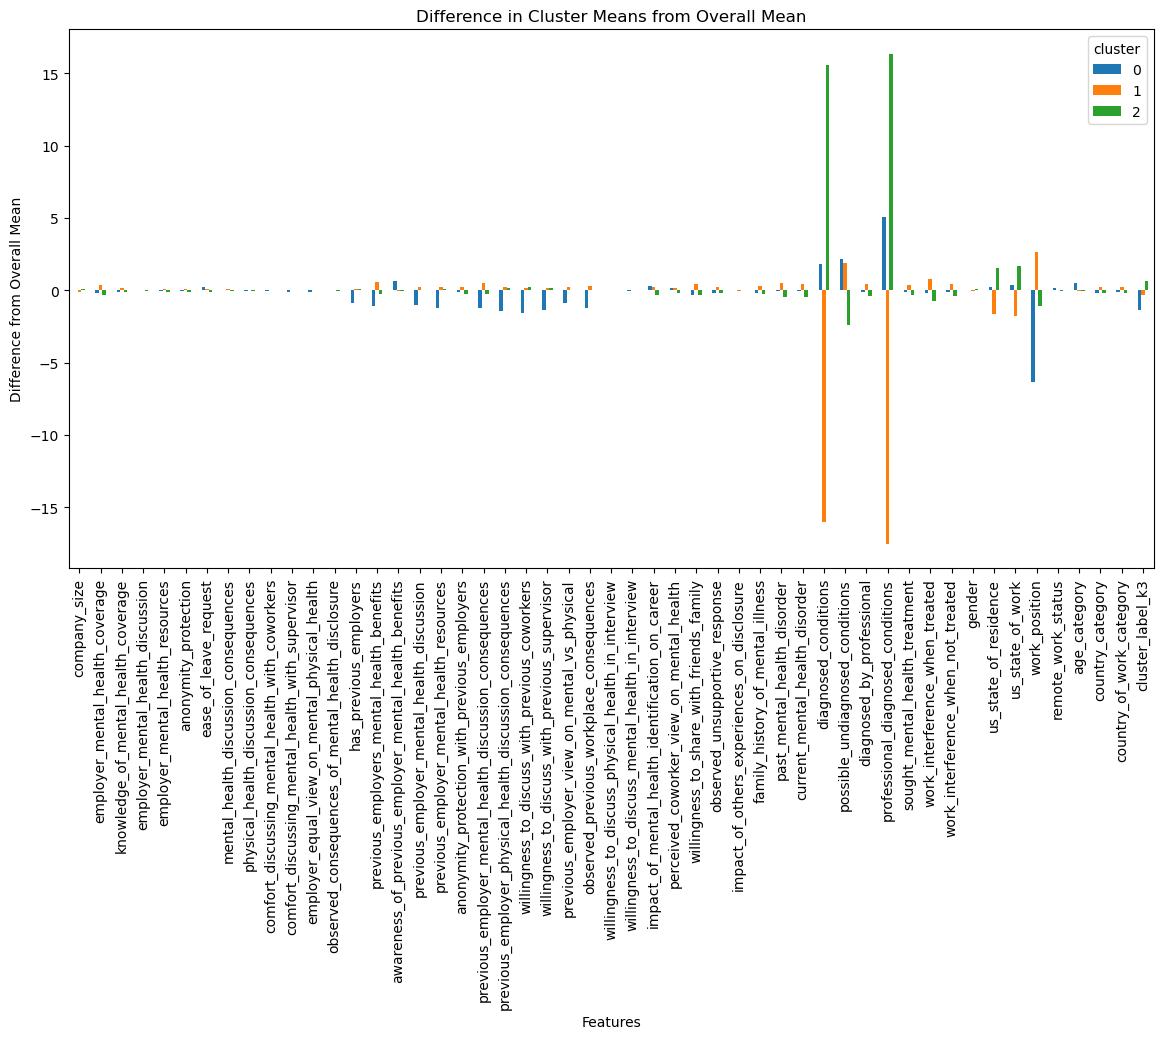

In [54]:
# Assuming 'data' is your original DataFrame and 'clusters_3' are your cluster labels

# Overall mean or median
overall_mean = data.mean()
overall_median = data.median()

# Cluster means or medians
cluster_means = cluster_analysis_df.groupby('cluster').mean()
cluster_medians = cluster_analysis_df.groupby('cluster').median()

# Difference between cluster mean/median and overall mean/median
cluster_mean_diff = cluster_means - overall_mean
cluster_median_diff = cluster_medians - overall_median

# Optionally, perform statistical tests to confirm the significance of differences

# Visualization example for cluster means
(cluster_mean_diff.T).plot(kind='bar', figsize=(14, 7))
plt.title('Difference in Cluster Means from Overall Mean')
plt.ylabel('Difference from Overall Mean')
plt.xlabel('Features')
plt.show()


#### Based on the graph provided, here are some potential interpretations:

##### Cluster 0 (Orange):

This cluster has a few features that significantly deviate from the overall mean, especially towards the negative side. This could indicate that individuals in this cluster are less likely to report certain experiences or conditions compared to the average across all clusters.
Notable features where this cluster differs greatly from the overall mean might be related to the perception of mental health discussion consequences, knowledge of mental health coverage, and ease of leave request.

##### Cluster 1 (Green):

This cluster has several features with a positive deviation from the overall mean. These might be the distinguishing factors for this cluster, suggesting that individuals in Cluster 1 are more likely to have certain experiences or conditions compared to the overall average.
The positive spikes could indicate higher instances of mental health discussions, knowledge about mental health benefits, and perhaps more frequent observations of negative consequences for coworkers with mental health issues.

##### Cluster 2 (Blue):

This cluster has both positive and negative deviations, but less pronounced than Cluster 1. This might indicate a more moderate or average profile in terms of the survey responses.
The negative deviations from the overall mean could suggest that individuals in this cluster are less likely to experience certain conditions or are less aware of mental health resources compared to the overall population.

## Visualizations

### Box Plot

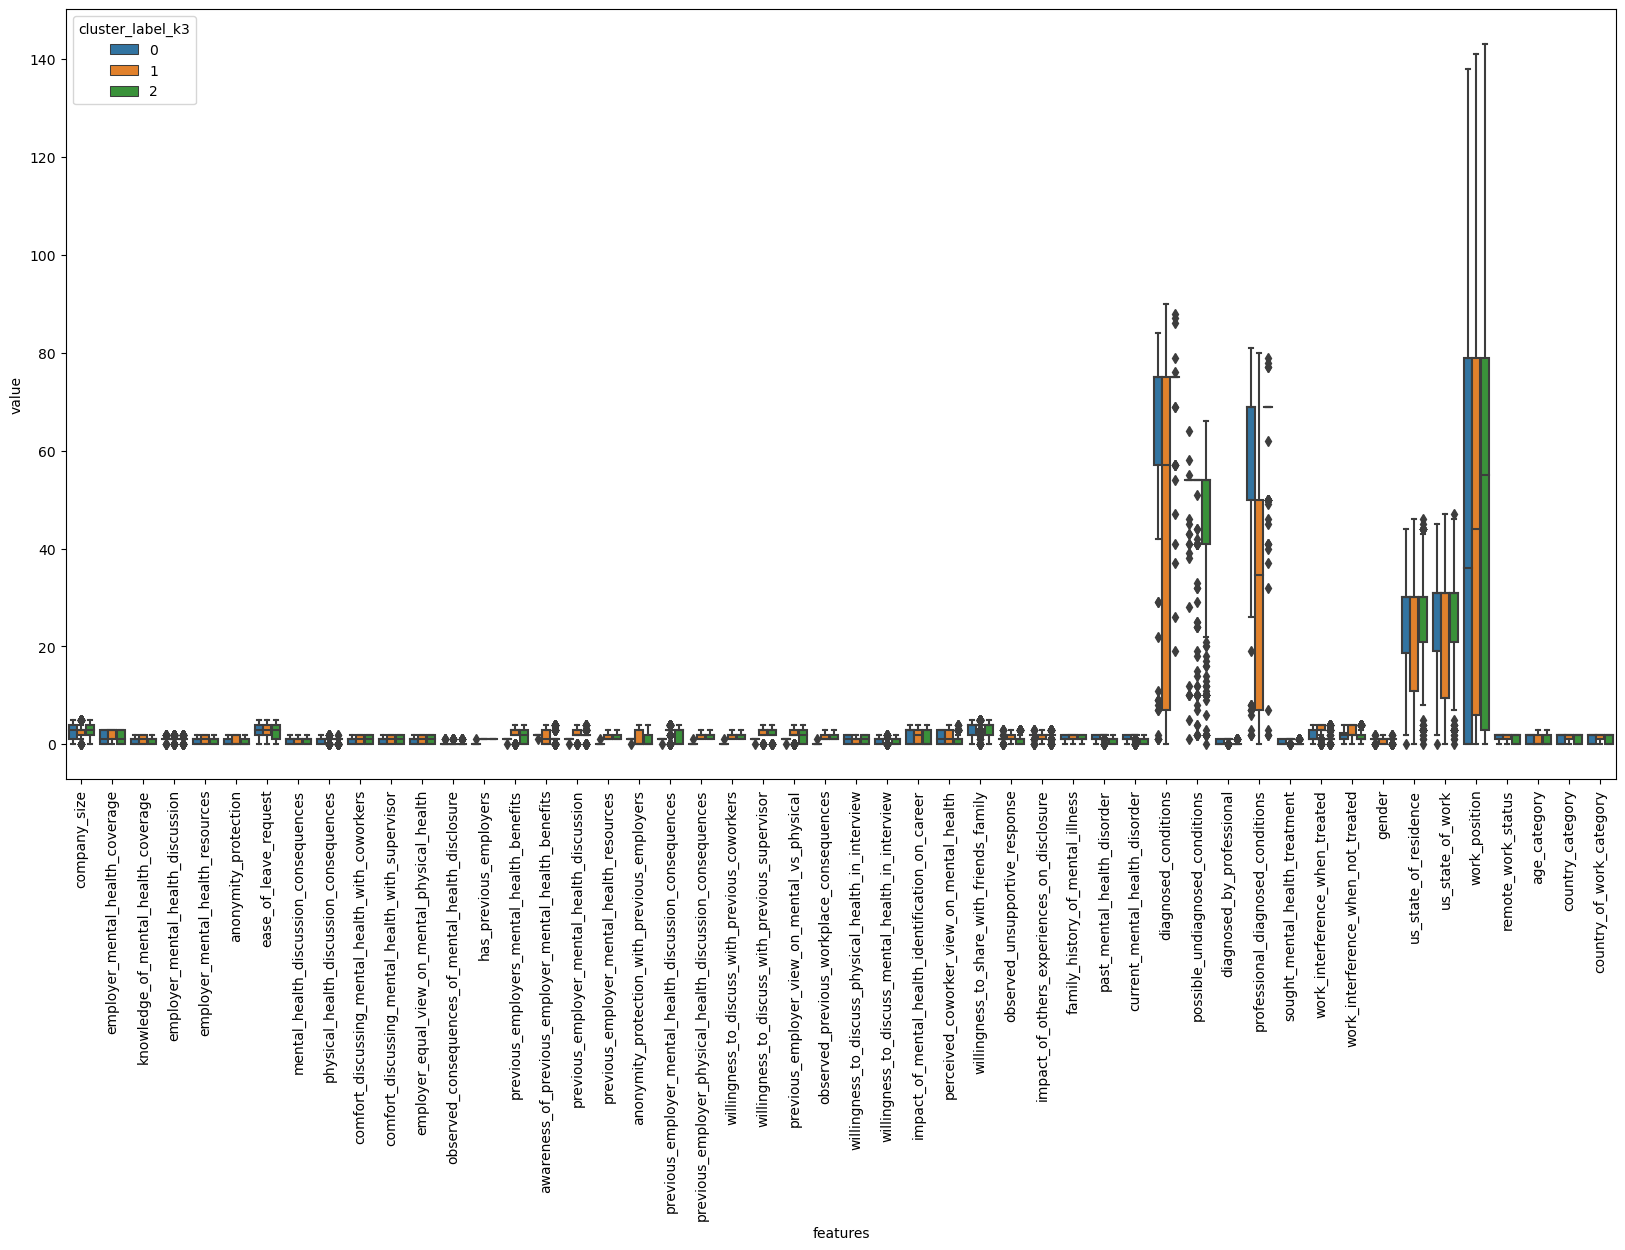

In [55]:
# Assuming 'data' is your DataFrame with clusters assigned
# and 'clusters_3' is the column with cluster labels

# Melting the DataFrame for easier plotting
cluster_melted = pd.melt(data, id_vars=['cluster_label_k3'], var_name='features', value_name='value')

# Creating box plots for each feature by cluster
plt.figure(figsize=(20, 10))
sns.boxplot(x='features', y='value', hue='cluster_label_k3', data=cluster_melted)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

### Radar Chart

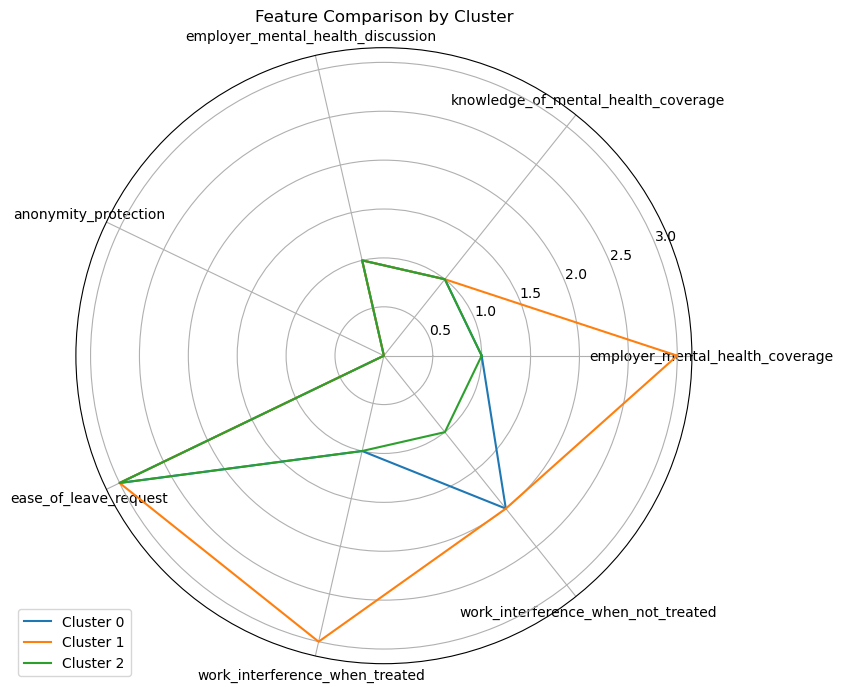

In [56]:
# Select features to include in the radar chart
features_to_plot = [
    'employer_mental_health_coverage', 
    'knowledge_of_mental_health_coverage', 
    'employer_mental_health_discussion', 
    'anonymity_protection', 
    'ease_of_leave_request', 
    'work_interference_when_treated', 
    'work_interference_when_not_treated'
]

num_vars = len(features_to_plot)

# Compute the angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for cluster_num in range(3):  # Assuming 3 clusters
    values = data[data['cluster_label_k3'] == cluster_num][features_to_plot].median().values.tolist()
    values += values[:1]  # Complete the loop
    
    ax.plot(angles, values, label=f'Cluster {cluster_num}')

# Add feature labels to the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features_to_plot)

# Add a legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Feature Comparison by Cluster')

plt.show()


#### Based on the chart, here are some interpretations regarding the clusters:

##### Cluster 0 (Blue):

Shows moderate levels across most features.
Indicates average knowledge of mental health coverage and average mental health discussions by employers.
This cluster seems to have the least work interference when mental health issues are treated and not treated compared to other clusters.
Anonymity protection and ease of leave might not be as favorable as in other clusters.

##### Cluster 1 (Orange):

Exhibits high employer mental health coverage, suggesting that employers in this cluster provide good mental health coverage options.
Reflects high knowledge of mental health coverage and discussions about mental health.
Demonstrates the highest work interference when mental health issues are not treated, which could suggest a significant impact of untreated mental health issues on work performance in this cluster.
Anonymity protection and ease of leave are rated better than in Cluster 0 but not as high as in Cluster 2.

##### Cluster 2 (Green):

Scores highest for ease of leave request, indicating this cluster finds it easiest to request leave for mental health issues.
Has the highest ratings for anonymity protection, suggesting that this cluster feels their privacy is well-protected when seeking mental health treatment.
Reports lower work interference when mental health issues are treated compared to Cluster 1 but more than Cluster 0.
Similar to Cluster 1 in terms of employer mental health coverage and discussion, but not as high in knowledge of mental health coverage.

### Statistical Tests

In [57]:

# Dictionary to hold ANOVA results
anova_results = {}

# Perform ANOVA for each feature
for feature in features_to_plot:
    # Get the data for each cluster
    data_cluster_0 = cluster_analysis_df[cluster_analysis_df['cluster'] == 0][feature]
    data_cluster_1 = cluster_analysis_df[cluster_analysis_df['cluster'] == 1][feature]
    data_cluster_2 = cluster_analysis_df[cluster_analysis_df['cluster'] == 2][feature]
    
    # Perform ANOVA and get the p-value
    f_val, p_val = f_oneway(data_cluster_0, data_cluster_1, data_cluster_2)
    anova_results[feature] = p_val

# Sort results by p-value
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1])

# Display results
for feature, p_value in sorted_anova:
    print(f"{feature}: p-value = {p_value}")


work_interference_when_treated: p-value = 3.7594165203099382e-62
work_interference_when_not_treated: p-value = 4.856208696714353e-21
employer_mental_health_coverage: p-value = 1.5154753774116763e-14
knowledge_of_mental_health_coverage: p-value = 2.537599136974123e-09
anonymity_protection: p-value = 0.011646517702047016
employer_mental_health_discussion: p-value = 0.02429064536660769
ease_of_leave_request: p-value = 0.16483508098880822


#### Here's an interpretation based on the results provided:

##### Work Interference When Treated (p-value ≈ 3.76e-62):

This extremely low p-value suggests there is a statistically significant difference in how mental health treatment affects work performance across the clusters. This feature is a strong differentiator between the clusters.

##### Work Interference When Not Treated (p-value ≈ 4.86e-21):

Similar to when treated, there's a statistically significant difference between the clusters regarding work performance when mental health issues are not treated. This is also a distinguishing feature.

##### Employer Mental Health Coverage (p-value ≈ 1.52e-14):

There is a statistically significant difference in the provision of mental health coverage by employers across clusters. This feature clearly differentiates the clusters.

##### Knowledge of Mental Health Coverage (p-value ≈ 2.54e-09):

There is a significant difference in the level of knowledge about mental health coverage options across the clusters.

##### Anonymity Protection (p-value ≈ 0.0116):

The p-value is less than 0.05, which suggests that there is a statistically significant difference in perceptions or policies of anonymity protection when seeking mental health treatment across the clusters, although this feature is less of a differentiator compared to the previous ones.

##### Employer Mental Health Discussion (p-value ≈ 0.0243):

This p-value indicates a significant difference across clusters regarding whether employers have formal discussions about mental health. It's a distinguishing feature but less strong compared to 'work interference' features.

##### Ease of Leave Request (p-value ≈ 0.1648):

The p-value is greater than 0.05, suggesting that there is no statistically significant difference in the ease of requesting leave for mental health reasons across the clusters based on the standard threshold for significance. This feature does not appear to differentiate between the clusters as strongly as the others.